In [1]:
# Import required libraries
using LinearAlgebra, Random, Plots, Plots.PlotMeasures

# Plot colours
pltColours = ["#4c599a", "#e66c6c", "#7bc572", "#fda440", "#55bad8",
                "#e467a8", "#6ba2d8", "#c87fcd", "#448b26", "#565559"]

d = 4     # Dimension of Hilbert space
N = 5000  # Number of points in ensemble
Nₛ = 200  # Number of standard deviations to test

# List of random functions. Each random function f(σ)
# should return a random number from a distribution
# symmetric about 0 with a standard deviation of σ
fᵣ = Dict(
    "uniform" => σ -> (2rand()-1)*2*√3*σ,  # Uniform distribution
    "normal" => σ -> randn()*σ           # Normal/Gaussian distribution
)

function generate𝓕(𝓓,σₘ)
    σ = range(1/Nₛ,σₘ,length=Nₛ) # array containing σ
    𝓕₀  = zeros(Nₛ) # array containing ⟨F⟩
    𝓕²₀ = zeros(Nₛ) # array containing ⟨F²⟩
    𝓕₁  = zeros(Nₛ) # array containing |tr⟨U⟩|/d
    𝓕²₁ = zeros(Nₛ) # array containing lowest-order cumulant expansion of ⟨F²⟩
    for n ∈ 1:Nₛ
        ν = [[fᵣ[𝓓](σ[n]) for _ ∈ 1:d] for _ ∈ 1:N] # Generate νₖ = ∫dt' δV(t')/ħ such that νₖ ∼ 𝓓(σ)
        U = [Diagonal(exp.(-im*ν[i])) for i ∈ 1:N]  # Generate U = diag(exp(-iν₁), exp(-iν₂), …)
        𝓕₀[n]  = sum([abs(tr(u)) for u ∈ U])/N/d    # Calculate ⟨F⟩ = ⟨|tr(U)|⟩/d
        𝓕²₀[n] = sum([abs2(tr(u)) for u ∈ U])/N/d^2 # Calculate ⟨F²⟩ = ⟨|tr(U)|²⟩/d²
        𝓕₁[n]  = abs(tr(sum(U)/N))/d                # Calculate |tr⟨U⟩|/d
        𝓕²₁[n] = 1/d                                # Calculate ⟨F²⟩ ≈ 1/d + 2/d² ∑ⱼ<ₖ exp(-½⟨νⱼ²⟩)exp(-½⟨νₖ²⟩)exp(-⟨νⱼνₖ⟩)
        for j ∈ 1:d, k ∈ j+1:d
            𝓕²₁[n] += 2/d^2*exp(-real(sum(ν[i][j]^2 for i ∈ 1:N))/2N) *
                    exp(-real(sum(ν[i][k]^2 for i ∈ 1:N))/2N) *
                    exp(real(sum(ν[i][j]*ν[i][k] for i ∈ 1:N))/N)
        end
    end
    return σ,𝓕₀,𝓕²₀,𝓕₁,𝓕²₁
end

function plotFidelity(𝓓,σₘ)
    σ,𝓕₀,𝓕²₀,𝓕₁,𝓕²₁ = generate𝓕(𝓓,σₘ)
    plt = scatter(σ,𝓕₀,label="⟨F⟩",color=pltColours[1],markerstrokewidth=0, size=(650,300))
    scatter!(plt,σ,.√𝓕²₀,label="√⟨F²⟩",color=pltColours[2],markerstrokewidth=0)
    scatter!(plt,σ,𝓕₁,label="|tr⟨U⟩|/d",color=pltColours[3],marker=:cross,markersize=3)
    scatter!(plt,σ,.√𝓕²₁,label="≈ √⟨F²⟩",color=pltColours[4],marker=:cross,markersize=3)
    title!(plt,"σ ≤ $σₘ, νₖ ~ $𝓓")
    xlabel!(plt,"Standard Deviation σ")
    ylabel!(plt,"Average Fidelity")
    display(plt)
end

plotFidelity (generic function with 1 method)

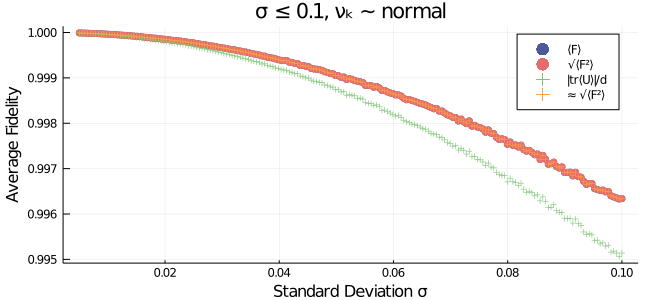

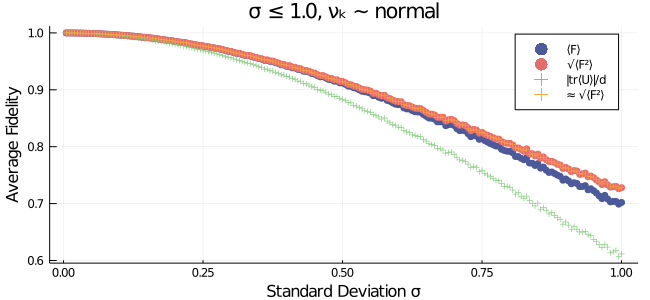

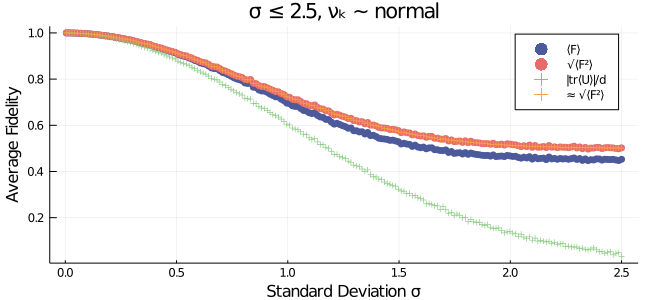

In [2]:
𝓓 = "normal"  # Random distribution to use

for σₘ ∈ [0.1,1.0,2.5] # Maximum standard deviation
    plotFidelity(𝓓,σₘ)
end

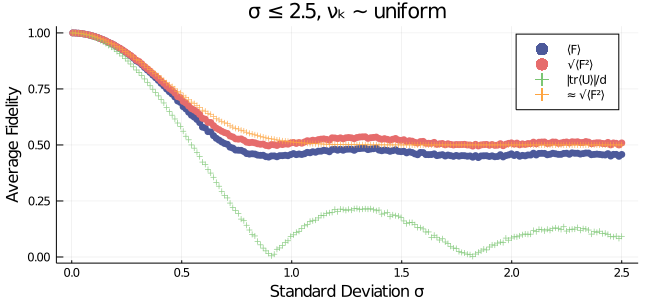

In [3]:
𝓓 = "uniform"  # Random distribution to use
σₘ = 2.5      # Maximum standard deviation

plotFidelity(𝓓,σₘ)

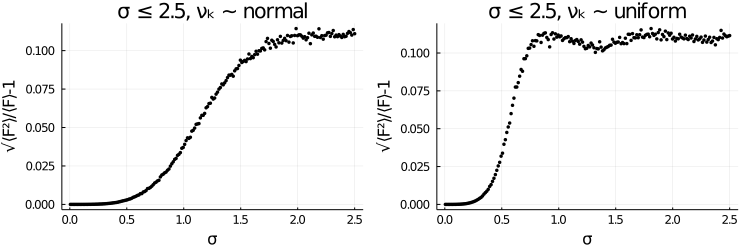

In [4]:
σₘ = 2.5 # Maximum standard deviation

plots = Dict()
for 𝓓 ∈ ["normal","uniform"]
    σ,𝓕₀,𝓕²₀,_,_ = generate𝓕(𝓓,σₘ)
    plots[𝓓] = scatter(
        σ,.√𝓕²₀ ./ 𝓕₀ .- 1,
        color="black", markerstrokewidth=0,
        markersize=2,
        label=false,
        xlabel="σ", ylabel="√⟨F²⟩/⟨F⟩-1",
        title="σ ≤ $σₘ, νₖ ~ $𝓓"
    )
end

display(plot(values(plots)..., size=(750,250),bottom_margin=3mm))